Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [4]:
import requests
import json
import pandas as pd
import unidecode
import numpy as np
import pickle

In [5]:
# Details of city_bikes brought from the previous database
# set city 
city_name = "boston"
print(city_name)

boston


In [6]:
# get response for all networks and normalize into dataframe
response = requests.request('GET',url="http://api.citybik.es/v2/networks")
data_networks = response.json()
df_networks = pd.json_normalize(data_networks['networks'])
print(df_networks)

                                       company  \
0                             [ЗАО «СитиБайк»]   
1               [Urban Infrastructure Partner]   
2                          [Comunicare S.r.l.]   
3                         [Cyclopolis Systems]   
4    [Groundwork, Slough Borough Council, ITS]   
..                                         ...   
607                             [PubliBike AG]   
608                             [PubliBike AG]   
609                             [PubliBike AG]   
610      [Citybike Normandie, INURBA Mobility]   
611         [The National Transport Authority]   

                                       href                         id  \
0              /v2/networks/velobike-moscow            velobike-moscow   
1              /v2/networks/baerum-bysykkel            baerum-bysykkel   
2             /v2/networks/bicincitta-siena           bicincitta-siena   
3          /v2/networks/cyclopolis-maroussi        cyclopolis-maroussi   
4            /v2/networks/cyc

In [7]:
# get list of cities, remove accents, and convert to lowercase
city_list = df_networks['location.city'].values
city_list = np.array([unidecode.unidecode(city).lower() for city in city_list])
print(city_list)

['moscow' 'baerum' 'siena' 'maroussi' 'slough' 'nafplio'
 'parco dei colli di bergamo' 'aigialeia' 'marathon' 'mantova'
 'nea smyrni' 'moschato-tavros' 'arxaia olympia' 'kiato' 'assemini'
 'rhodes' 'florina' 'tortoli' 'limnos' 'gaeta' 'borgarello'
 'pizzighettone e formigara' 'cork' 'limerick' 'bangkok' 'galway'
 'bielsko-biala' 'montecatini terme' 'bydgoszcz' 'london' 'aspen, co'
 'carrara' 'reykjavik' 'hamburg' 'sestri levante - lavagna' 'arezzo'
 'astana' 'paris' 'ascoli piceno' 'bergamo' 'girona' 'alba' 'milano'
 'biella' 'chivasso' 'zaragoza' 'cd de mexico' 'busto arsizio' 'antwerpen'
 'cuneo' 'malmo' 'las condes' 'madrid' 'didymoteicho' 'frosinone'
 'glyfada' 'igoumenitsa' 'lecce' 'ioannina' 'karditsa' 'manerba del garda'
 'kavala' 'kinouria' 'komotini' 'patra' 'marciana marina' 'rethymno'
 'samos' 'novara' 'nicosia' 'mani' 'irakleio' 'thessaloniki' 'athens'
 'padova' 'sao paulo' 'a coruna' 'ferrol - naron'
 'curtin university, perth, wa' 'melbourne, au' 'ferrara' 'montreal, qc'


In [8]:
# get list of endpoints for the specified city
hrefs = df_networks.loc[[True if 'boston' in city else False for city in city_list ],'href']
N_hrefs = hrefs.shape[0]
print(N_hrefs)


1


In [10]:
# set up a dataframe to store stations data
df = pd.DataFrame()

In [11]:
# go through each endpoint (there will likely only be one)
for href in hrefs.values:
    print("http://api.citybik.es" + href)

http://api.citybik.es/v2/networks/blue-bikes


In [13]:
# get the stations data for that endpoint
response = requests.request('GET',url="http://api.citybik.es" + href + "?fields=stations")
data = response.json()
df = pd.json_normalize(data)

print(df)

                                    network.stations
0  [{'empty_slots': 10, 'extra': {'ebikes': 0, 'h...


In [14]:
# extract the stations only and add to the dataframe
stations = data['network']['stations']
df_new = pd.json_normalize(stations)
df = pd.concat([df, df_new])
print(df)

                                      network.stations  empty_slots  \
0    [{'empty_slots': 10, 'extra': {'ebikes': 0, 'h...          NaN   
0                                                  NaN         10.0   
1                                                  NaN         29.0   
2                                                  NaN         15.0   
3                                                  NaN         13.0   
..                                                 ...          ...   
450                                                NaN          7.0   
451                                                NaN          9.0   
452                                                NaN          6.0   
453                                                NaN          7.0   
454                                                NaN          5.0   

     free_bikes                                id   latitude  longitude  \
0           NaN                               NaN        NaN        NaN 

In [15]:
df.head(10)

,network.stations,empty_slots,free_bikes,id,latitude,longitude,name,timestamp,extra.ebikes,extra.has_ebikes,extra.last_updated,extra.payment,extra.payment-terminal,extra.renting,extra.returning,extra.slots,extra.uid
0,"[{'empty_slots': 10, 'extra': {'ebikes': 0, 'h...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,10.0,9.0,553ed0300d38108b4f21a6bafa3db70c,42.386781,-71.006098,Orient Heights T Stop - Bennington St at Sarat...,2023-07-04T11:39:05.433000Z,0.0,True,1.688461e+09,"[creditcard, key]",True,1.0,1.0,19.0,217
1,NaN,29.0,2.0,93542dcbf21f5411569adb92cd7cc199,42.368844,-71.039778,Maverick Square - Lewis Mall,2023-07-04T11:39:05.436000Z,0.0,True,1.688470e+09,"[creditcard, key]",True,1.0,1.0,33.0,212
2,NaN,15.0,1.0,d9c7ef5dbda4ed944d1bf51fe540acb6,42.369536,-71.039431,East Boston Neighborhood Health Center - 20 Ma...,2023-07-04T11:39:05.437000Z,0.0,True,1.688441e+09,"[creditcard, key]",True,1.0,1.0,16.0,213
3,NaN,13.0,2.0,0568389e659e679fbe29a5ac12cd49c0,42.383533,-71.016191,Bennington St at Byron St,2023-07-04T11:39:05.438000Z,0.0,True,1.688459e+09,"[creditcard, key]",True,1.0,1.0,15.0,210
4,NaN,3.0,12.0,47b79abc28a54d0e4689b1096ceb8466,42.373312,-71.041020,Boston East - 126 Border St,2023-07-04T11:39:05.440000Z,0.0,True,1.688470e+09,"[creditcard, key]",True,1.0,1.0,15.0,219
5,NaN,8.0,15.0,68fc84a359655b54175ddc443e79003b,42.310579,-71.107341,Green Street T Stop - Green St at Amory St,2023-07-04T11:39:05.235000Z,0.0,True,1.688461e+09,"[creditcard, key]",True,1.0,1.0,23.0,133
6,NaN,5.0,14.0,3831590999fc4a7f52d08952a6bd045d,42.361780,-71.108100,Dana Park,2023-07-04T11:39:05.242000Z,0.0,True,1.688467e+09,"[creditcard, key]",True,1.0,1.0,19.0,139
7,NaN,10.0,3.0,af050e8bab271eeebf49b5407a09d415,42.326599,-71.066498,Newmarket Square T Stop - Massachusetts Ave at...,2023-07-04T11:39:05.242000Z,0.0,True,1.688461e+09,"[creditcard, key]",True,1.0,1.0,15.0,138
8,NaN,1.0,17.0,1b7f50a75403e1f818b0b1dd81c09e9f,42.371197,-71.097599,Cambridge Dept. of Public Works -147 Hampshire...,2023-07-04T11:39:05.484000Z,0.0,True,1.688461e+09,"[creditcard, key]",True,1.0,1.0,19.0,225


In [16]:
df.count()

network.stations            1
empty_slots               455
free_bikes                455
id                        455
latitude                  455
longitude                 455
name                      455
timestamp                 455
extra.ebikes              455
extra.has_ebikes          455
extra.last_updated        455
extra.payment             455
extra.payment-terminal    455
extra.renting             455
extra.returning           455
extra.slots               455
extra.uid                 455
dtype: int64

In [17]:
#handling missing values
# Count the number of missing values in each columns in table df
df.isnull().sum()

# output shows that in city_bikes da, there are no missing values for name, id, logitude ad latitude , timestamp.The same applies columns in foursquare and Yelp   dataframe.

network.stations          455
empty_slots                 1
free_bikes                  1
id                          1
latitude                    1
longitude                   1
name                        1
timestamp                   1
extra.ebikes                1
extra.has_ebikes            1
extra.last_updated          1
extra.payment               1
extra.payment-terminal      1
extra.renting               1
extra.returning             1
extra.slots                 1
extra.uid                   1
dtype: int64

In [18]:
# no of zeros in a colunmn in df eg extra.slots in the city data frame gave 1 the  same code was used for Foursquare and yelp.
(df['extra.slots']==0).sum()

# output =1

1

In [19]:
(df['extra.ebikes']==0).sum()

455

In [20]:
(df['empty_slots']==0).sum()

20

In [21]:
(df['free_bikes']==0).sum()

15

In [22]:
#Check for duplicates in specific columns
df.duplicated(subset=['id'])


0      False
0      False
1      False
2      False
3      False
       ...  
450    False
451    False
452    False
453    False
454    False
Length: 456, dtype: bool

In [23]:
df.count

<bound method DataFrame.count of                                       network.stations  empty_slots  \
0    [{'empty_slots': 10, 'extra': {'ebikes': 0, 'h...          NaN   
0                                                  NaN         10.0   
1                                                  NaN         29.0   
2                                                  NaN         15.0   
3                                                  NaN         13.0   
..                                                 ...          ...   
450                                                NaN          7.0   
451                                                NaN          9.0   
452                                                NaN          6.0   
453                                                NaN          7.0   
454                                                NaN          5.0   

     free_bikes                                id   latitude  longitude  \
0           NaN                        

In [24]:
#to retrieve foursquare data
# for foursquare
import pandas as pd
import requests

# Assuming you have a dataframe called 'austinbikes_df' with station data
foursquare_api_key = '<API KEY>'

URL = "https://api.foursquare.com/v3/places/search"

header_dict = {
    "Accept": "application/json",
    "Authorization": foursquare_api_key
}

a = []
b = []
c = []
d = []
e = []
f = []

for index, row in df.iterrows():
    # Extract station coordinates
    lat = row['latitude']
    lng = row['longitude']
    location = f"{lat},{lng}"
    # Set parameters for Foursquare API request
    params = {
        "query": "restaurant",
        "ll": location,
        "radius": "1000"
    }

    response = requests.get(URL, params=params, headers=header_dict)
    res_json = response.json()
    try:
        for i in res_json["results"]:
            a.append(i.get("name", None))  # Append name to 'a' list
            if "address" in i.get("location", {}):
                b.append(i["location"]["address"])  # Append address to 'b' list
            else:
                b.append(None)
            if "categories" in i:
                c.append(i["categories"][0].get("id", None))  # Append category ID to 'c' list
                d.append(i["categories"][0].get("name", None))  # Append category name to 'd' list
            else:
                c.append(None)
                d.append(None)
            e.append(i["location"].get("postcode", None))  # Append postcode to 'e' list
            f.append(i.get("distance", None))  # Append distance to 'f' list
    except:
        pass

foursquare_df = pd.DataFrame({"name": a, "address": b, "category_id": c, "category_name": d, "postcode": e, "distance": f})

# Print or do further processing with the dataframe 'df'
print(foursquare_df)



                            name             address  category_id  \
0             Donna's Restaurant     980 Saratoga St        13068   
1          New Saigon Restaurant       Bennington St        13379   
2                    Little Asia   991 Bennington St        13072   
3     Orient Heights Food Market  1016 Bennington St        17069   
4              El Paisa Butchery  1010 Bennington St        13039   
...                          ...                 ...          ...   
4491     Picco Pizza & Ice Cream      513 Tremont St        13236   
4492         Blackbird Doughnuts      492 Tremont St        13043   
4493                     Dunkin'  1138 Washington St        13001   
4494            Kava Neo-Taverna     315 Shawmut Ave        13003   
4495           South End Buttery     314 Shawmut Ave        13002   

              category_name postcode  distance  
0       American Restaurant    02128        93  
1     Vietnamese Restaurant    02128       117  
2          Asian Restaur

In [25]:
foursquare_df

,name,address,category_id,category_name,postcode,distance
0,Donna's Restaurant,980 Saratoga St,13068,American Restaurant,02128,93
1,New Saigon Restaurant,Bennington St,13379,Vietnamese Restaurant,02128,117
2,Little Asia,991 Bennington St,13072,Asian Restaurant,02128,92
3,Orient Heights Food Market,1016 Bennington St,17069,Grocery Store,02128,25
4,El Paisa Butchery,1010 Bennington St,13039,Deli,02128,51
...,...,...,...,...,...,...
4491,Picco Pizza & Ice Cream,513 Tremont St,13236,Italian Restaurant,02116,253
4492,Blackbird Doughnuts,492 Tremont St,13043,Donut Shop,02116,256
4493,Dunkin',1138 Washington St,13001,Bagel Shop,02118,149
4494,Kava Neo-Taverna,315 Shawmut Ave,13003,Bar,02118,300


In [26]:
# check duplicates====== 
foursquare_df.duplicated(subset=['category_id'],keep=False)

0       True
1       True
2       True
3       True
4       True
        ... 
4491    True
4492    True
4493    True
4494    True
4495    True
Length: 4496, dtype: bool

In [27]:
column_duplicates = foursquare_df.duplicated('category_id').sum()
column_duplicates

4366

In [28]:
# for yelp data
import pandas as pd
import requests
import os

# Assuming you have a dataframe called 'austinbikes_df' with station data
yelp_key = '<API KEY>'

URL = "https://api.yelp.com/v3/businesses/search"

header_dict = {
    "Accept": "application/JSON",
    "Authorization": "Bearer " + '<API KEY>'
}
a = []
b = []
c = []
d = []
e = []
f = []
g = []
h = []
j = []

for index, row in df.iterrows():
    # Extract station coordinates
    lat = row['latitude']
    lng = row['longitude']
    location = f"{lat},{lng}"

    # Set parameters for Yelp API request
    params = {
        "term": "restaurant",
        "location": location,
        "radius": "1000"
    }

    response = requests.get(URL, params=params, headers=header_dict)
    res_json = response.json()

    try:
        for i in res_json["businesses"]:
            a.append(i.get("name", None))  # Append name to 'a' list
            if "location" in i and "address1" in i["location"]:
                b.append(i["location"]["address1"])  # Append address to 'b' list
                j.append(i["location"]["zip_code"])
            else:
                b.append(None)
                j.append(None)
            c.append(i.get("distance", None))  # Append transactions to 'c' list
            if "categories" in i and isinstance(i["categories"], list) and len(i["categories"]) > 0:
                d.append(i["categories"][0].get("title", None))  # Append category name to 'd' list
            else:
                d.append(None)
            e.append(i.get("review_count", None))  # Append review count to 'e' list
            f.append(i.get("rating", None))  # Append rating to 'f' list
            g.append(i["coordinates"].get("longitude", None))  # Append longitude to 'g' list
            h.append(i["coordinates"].get("latitude", None))  # Append latitude to 'h' list
    except:
        pass

yelp_df = pd.DataFrame({"name": a, "address": b, "distance": c, "category_name": d, "review_count": e, "rating": f, "longitude": g, "latitude": h, "postcode": j})

# Print or do further processing with the dataframe 'yelp_df'
print(yelp_df)



                                            name             address  \
0                 Angela's Cafe - Orient Heights  1012 Bennington St   
1    Luna's Restaurant Italian and Latin Cuisine     945 Saratoga St   
2                                     New Saigon   985 Bennington St   
3                             Donna's Restaurant     980 Saratoga St   
4                                 Renegade's Pub  1004 Bennington St   
..                                           ...                 ...   
589                           Third Cliff Bakery  3531 Washington St   
590               Chilacates Mexican Street Food       658 Centre St   
591                           Forest Hills Diner  3696 Washington St   
592                               Fiore's Bakery         55 South St   
593                 Jamaica Plain House of Pizza       775 Centre St   

       distance           category_name  review_count  rating  longitude  \
0     33.503191                 Mexican           141     4

In [29]:
yelp_df

,name,address,distance,category_name,review_count,rating,longitude,latitude,postcode
0,Angela's Cafe - Orient Heights,1012 Bennington St,33.503191,Mexican,141,4.5,-71.006310,42.387100,02128
1,Luna's Restaurant Italian and Latin Cuisine,945 Saratoga St,245.389220,Italian,124,4.5,-71.009160,42.386590,02128
2,New Saigon,985 Bennington St,107.990329,Vietnamese,205,4.5,-71.007323,42.386337,02128
3,Donna's Restaurant,980 Saratoga St,85.462869,American (Traditional),182,4.0,-71.007180,42.387020,02128
4,Renegade's Pub,1004 Bennington St,48.676351,Pubs,125,4.0,-71.006800,42.386890,02128
...,...,...,...,...,...,...,...,...,...
589,Third Cliff Bakery,3531 Washington St,659.607573,Cafes,61,4.5,-71.108879,42.305556,02130
590,Chilacates Mexican Street Food,658 Centre St,431.155525,Mexican,162,4.0,-71.114031,42.312811,02130
591,Forest Hills Diner,3696 Washington St,949.080324,Diners,58,4.0,-71.112610,42.300640,02130
592,Fiore's Bakery,55 South St,125.210444,Bakeries,374,4.0,-71.115828,42.307928,02130


To perform merging i followed the following steps

In [30]:
#combine/merge  foursquare_df and yelp_df
combined_df = pd.concat([foursquare_df, yelp_df])
combined_df

,name,address,category_id,category_name,postcode,distance,review_count,rating,longitude,latitude
0,Donna's Restaurant,980 Saratoga St,13068.0,American Restaurant,02128,93.000000,NaN,NaN,NaN,NaN
1,New Saigon Restaurant,Bennington St,13379.0,Vietnamese Restaurant,02128,117.000000,NaN,NaN,NaN,NaN
2,Little Asia,991 Bennington St,13072.0,Asian Restaurant,02128,92.000000,NaN,NaN,NaN,NaN
3,Orient Heights Food Market,1016 Bennington St,17069.0,Grocery Store,02128,25.000000,NaN,NaN,NaN,NaN
4,El Paisa Butchery,1010 Bennington St,13039.0,Deli,02128,51.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
589,Third Cliff Bakery,3531 Washington St,NaN,Cafes,02130,659.607573,61.0,4.5,-71.108879,42.305556
590,Chilacates Mexican Street Food,658 Centre St,NaN,Mexican,02130,431.155525,162.0,4.0,-71.114031,42.312811
591,Forest Hills Diner,3696 Washington St,NaN,Diners,02130,949.080324,58.0,4.0,-71.112610,42.300640
592,Fiore's Bakery,55 South St,NaN,Bakeries,02130,125.210444,374.0,4.0,-71.115828,42.307928


In [31]:
#cleaning process
#get duplicate records based on the name and address columns
duplicate_records = combined_df[combined_df.duplicated(subset=['name', 'address'], keep=False)]
duplicate_records

,name,address,category_id,category_name,postcode,distance,review_count,rating,longitude,latitude
0,Donna's Restaurant,980 Saratoga St,13068.0,American Restaurant,02128,93.000000,NaN,NaN,NaN,NaN
1,New Saigon Restaurant,Bennington St,13379.0,Vietnamese Restaurant,02128,117.000000,NaN,NaN,NaN,NaN
2,Little Asia,991 Bennington St,13072.0,Asian Restaurant,02128,92.000000,NaN,NaN,NaN,NaN
5,Sunny Cafe,1000 Bennington St,13276.0,Sushi Restaurant,02128,64.000000,NaN,NaN,NaN,NaN
9,Royal Roast Beef & Seafood,752 Bennington St,13068.0,American Restaurant,02128,401.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
586,Noodle Barn,707 Centre St,NaN,Noodles,02130,270.885476,229.0,3.5,-71.114670,42.311439
588,JPizle Kitchen,536 Centre St,NaN,Colombian,02130,896.793247,93.0,4.0,-71.113267,42.316966
589,Third Cliff Bakery,3531 Washington St,NaN,Cafes,02130,659.607573,61.0,4.5,-71.108879,42.305556
590,Chilacates Mexican Street Food,658 Centre St,NaN,Mexican,02130,431.155525,162.0,4.0,-71.114031,42.312811


In [32]:
#Drop duplicate records based on 'name'.
combined_df = combined_df.drop_duplicates(subset=['name'], keep='first')
combined_df

,name,address,category_id,category_name,postcode,distance,review_count,rating,longitude,latitude
0,Donna's Restaurant,980 Saratoga St,13068.0,American Restaurant,02128,93.000000,NaN,NaN,NaN,NaN
1,New Saigon Restaurant,Bennington St,13379.0,Vietnamese Restaurant,02128,117.000000,NaN,NaN,NaN,NaN
2,Little Asia,991 Bennington St,13072.0,Asian Restaurant,02128,92.000000,NaN,NaN,NaN,NaN
3,Orient Heights Food Market,1016 Bennington St,17069.0,Grocery Store,02128,25.000000,NaN,NaN,NaN,NaN
4,El Paisa Butchery,1010 Bennington St,13039.0,Deli,02128,51.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
553,Commonwealth Restaurant and Market,11 Broad Canal Way,NaN,American (Traditional),02142,318.138801,335.0,3.5,-71.082541,42.363255
573,Solid Ground Cafe,742 Huntington Ave,NaN,Coffee & Tea,02115,631.408699,93.0,4.5,-71.105440,42.333670
587,Juicygreens,61 South St,NaN,Juice Bars & Smoothies,02130,155.587571,95.0,4.0,-71.115817,42.307693
591,Forest Hills Diner,3696 Washington St,NaN,Diners,02130,949.080324,58.0,4.0,-71.112610,42.300640


In [33]:
#combine/merge  foursquare_df and yelp_df
totalcombined_df = pd.concat([df, combined_df])
totalcombined_df

,network.stations,empty_slots,free_bikes,id,latitude,longitude,name,timestamp,extra.ebikes,extra.has_ebikes,...,extra.returning,extra.slots,extra.uid,address,category_id,category_name,postcode,distance,review_count,rating
0,"[{'empty_slots': 10, 'extra': {'ebikes': 0, 'h...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,10.0,9.0,553ed0300d38108b4f21a6bafa3db70c,42.386781,-71.006098,Orient Heights T Stop - Bennington St at Sarat...,2023-07-04T11:39:05.433000Z,0.0,True,...,1.0,19.0,217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,29.0,2.0,93542dcbf21f5411569adb92cd7cc199,42.368844,-71.039778,Maverick Square - Lewis Mall,2023-07-04T11:39:05.436000Z,0.0,True,...,1.0,33.0,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,15.0,1.0,d9c7ef5dbda4ed944d1bf51fe540acb6,42.369536,-71.039431,East Boston Neighborhood Health Center - 20 Ma...,2023-07-04T11:39:05.437000Z,0.0,True,...,1.0,16.0,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,13.0,2.0,0568389e659e679fbe29a5ac12cd49c0,42.383533,-71.016191,Bennington St at Byron St,2023-07-04T11:39:05.438000Z,0.0,True,...,1.0,15.0,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,NaN,NaN,NaN,NaN,42.363255,-71.082541,Commonwealth Restaurant and Market,NaN,NaN,NaN,...,NaN,NaN,NaN,11 Broad Canal Way,NaN,American (Traditional),02142,318.138801,335.0,3.5
573,NaN,NaN,NaN,NaN,42.333670,-71.105440,Solid Ground Cafe,NaN,NaN,NaN,...,NaN,NaN,NaN,742 Huntington Ave,NaN,Coffee & Tea,02115,631.408699,93.0,4.5
587,NaN,NaN,NaN,NaN,42.307693,-71.115817,Juicygreens,NaN,NaN,NaN,...,NaN,NaN,NaN,61 South St,NaN,Juice Bars & Smoothies,02130,155.587571,95.0,4.0
591,NaN,NaN,NaN,NaN,42.300640,-71.112610,Forest Hills Diner,NaN,NaN,NaN,...,NaN,NaN,NaN,3696 Washington St,NaN,Diners,02130,949.080324,58.0,4.0


I saved all to my local machine  in csv file.

In [ ]:
# to save to your local machine
import pandas as pd
# Save the DataFrame as a CSV file
df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file1.csv', index=False)
foursquare_df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file2.csv', index=False)
yelp_df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file3.csv', index=False)
combined_df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file3.csv', index=False)
totalcombined_df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file4.csv', index=False)

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

EDA was used to visualize and explore the following number of extra_slots df(city_bikes)
it also help in exploring visualizations of the data in yelp_df and combined_df.
it uncoverED, the patterns, and the relationships between variables(areas of free bikes and nearness to restaurant)
EDA was used to also validate the merged dataframe.

In [34]:
# summary statistics of totalcombined_df distribution.
totalcombined_df.describe()

,empty_slots,free_bikes,latitude,longitude,extra.ebikes,extra.last_updated,extra.renting,extra.returning,extra.slots,category_id,distance,review_count,rating
count,455.000000,455.000000,704.000000,704.000000,455.0,4.550000e+02,455.000000,455.000000,455.000000,1680.000000,1929.000000,249.000000,249.000000
mean,9.195604,7.415385,42.353308,-71.082766,0.0,1.684752e+09,0.997802,0.997802,17.219780,13162.164286,298.423126,273.433735,3.893574
std,5.716810,4.969176,0.042196,0.048403,0.0,7.915230e+07,0.046881,0.046881,4.880064,642.613781,230.521857,531.803267,0.862362
min,0.000000,0.000000,42.255600,-71.247759,0.0,8.640000e+04,0.000000,0.000000,0.000000,10000.000000,5.000000,0.000000,0.000000
25%,5.000000,4.000000,42.335505,-71.108718,0.0,1.688461e+09,1.000000,1.000000,15.000000,13033.750000,117.000000,24.000000,4.000000
50%,8.000000,6.000000,42.351644,-71.083979,0.0,1.688461e+09,1.000000,1.000000,16.000000,13064.000000,231.000000,82.000000,4.000000
75%,13.000000,11.000000,42.371996,-71.060657,0.0,1.688467e+09,1.000000,1.000000,19.000000,13180.500000,437.637827,269.000000,4.500000
max,35.000000,26.000000,42.534669,-70.870214,0.0,1.688471e+09,1.000000,1.000000,53.000000,18065.000000,1190.893088,4044.000000,5.000000


In [35]:
# summary statistics of the totalcombined data distribution from the 3 APIs (citybikes, Foursquare, Yelp)
totalcombined_df.describe()

,empty_slots,free_bikes,latitude,longitude,extra.ebikes,extra.last_updated,extra.renting,extra.returning,extra.slots,category_id,distance,review_count,rating
count,455.000000,455.000000,704.000000,704.000000,455.0,4.550000e+02,455.000000,455.000000,455.000000,1680.000000,1929.000000,249.000000,249.000000
mean,9.195604,7.415385,42.353308,-71.082766,0.0,1.684752e+09,0.997802,0.997802,17.219780,13162.164286,298.423126,273.433735,3.893574
std,5.716810,4.969176,0.042196,0.048403,0.0,7.915230e+07,0.046881,0.046881,4.880064,642.613781,230.521857,531.803267,0.862362
min,0.000000,0.000000,42.255600,-71.247759,0.0,8.640000e+04,0.000000,0.000000,0.000000,10000.000000,5.000000,0.000000,0.000000
25%,5.000000,4.000000,42.335505,-71.108718,0.0,1.688461e+09,1.000000,1.000000,15.000000,13033.750000,117.000000,24.000000,4.000000
50%,8.000000,6.000000,42.351644,-71.083979,0.0,1.688461e+09,1.000000,1.000000,16.000000,13064.000000,231.000000,82.000000,4.000000
75%,13.000000,11.000000,42.371996,-71.060657,0.0,1.688467e+09,1.000000,1.000000,19.000000,13180.500000,437.637827,269.000000,4.500000
max,35.000000,26.000000,42.534669,-70.870214,0.0,1.688471e+09,1.000000,1.000000,53.000000,18065.000000,1190.893088,4044.000000,5.000000


In [360]:
df.describe() #summary statistics of city_bikes in Boston

,Unnamed: 0.1,Unnamed: 0,empty_slots,free_bikes,latitude,longitude,extra.ebikes,extra.last_updated,extra.renting,extra.returning,extra.slots,extra.uid
count,456.00000,456.000000,455.000000,455.000000,455.000000,455.000000,455.0,4.550000e+02,455.0,455.0,455.000000,455.000000
mean,227.50000,226.502193,9.472527,7.171429,42.360047,-71.085140,0.0,1.684600e+09,1.0,1.0,17.208791,303.870330
std,131.78012,131.776334,5.643484,4.821626,0.046573,0.054839,0.0,7.914517e+07,0.0,0.0,4.881676,186.428958
min,0.00000,0.000000,0.000000,0.000000,42.255600,-71.247759,0.0,8.640000e+04,1.0,1.0,0.000000,3.000000
25%,113.75000,112.750000,5.000000,3.000000,42.337502,-71.116519,0.0,1.688310e+09,1.0,1.0,15.000000,127.000000
50%,227.50000,226.500000,9.000000,7.000000,42.358100,-71.087567,0.0,1.688321e+09,1.0,1.0,16.000000,338.000000
75%,341.25000,340.250000,13.000000,10.000000,42.380305,-71.062844,0.0,1.688322e+09,1.0,1.0,19.000000,473.000000
max,455.00000,454.000000,33.000000,30.000000,42.534669,-70.870214,0.0,1.688323e+09,1.0,1.0,53.000000,600.000000


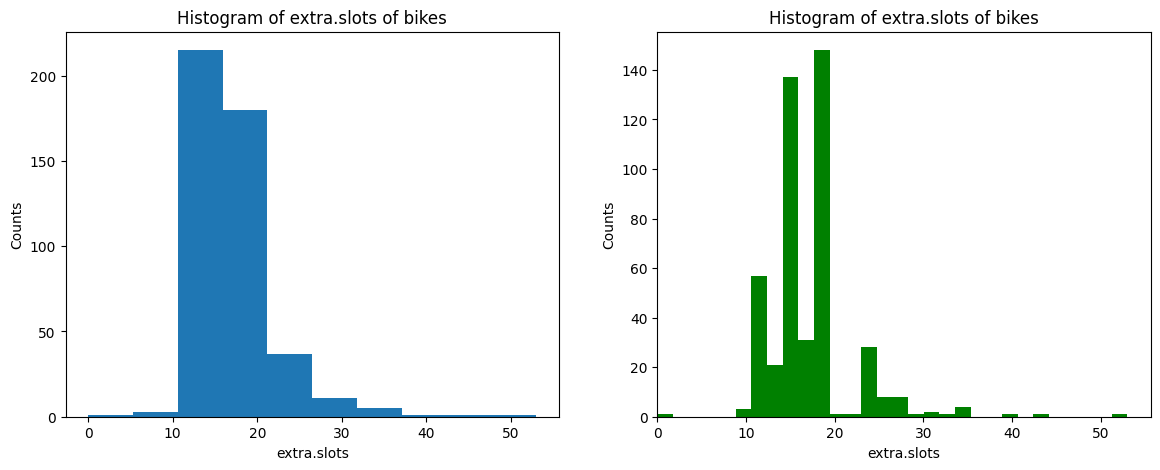

In [361]:
# Histogram showing the no of counts of extra.slot of bike distribution.(normality test ie distribution test verification.)

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows = 1, 
                         ncols = 2, 
                         figsize=(14, 5)        
                        )

# Plot 0
axes[0].hist(df['extra.slots'])
axes[0].set_title('Histogram of extra.slots of bikes')
axes[0].set_xlabel('extra.slots')
axes[0].set_ylabel('Counts')

# Plot 1
axes[1].hist(df['extra.slots'], bins=30, color='green')
axes[1].set_title('Histogram of extra.slots of bikes')
axes[1].set_xlabel('extra.slots')
axes[1].set_ylabel('Counts')
axes[1].set_xlim(left=0)

plt.show()

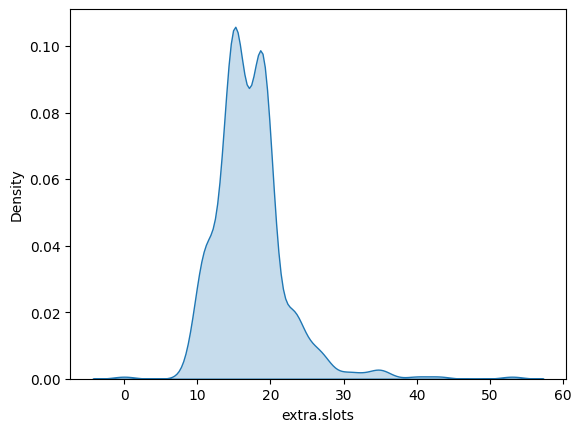

In [362]:
#variation of distribution of extra slot of bikes in Boston city
sns.kdeplot(data=df, 
            x="extra.slots", 
            fill=True)
plt.show()
# almost normal distribution

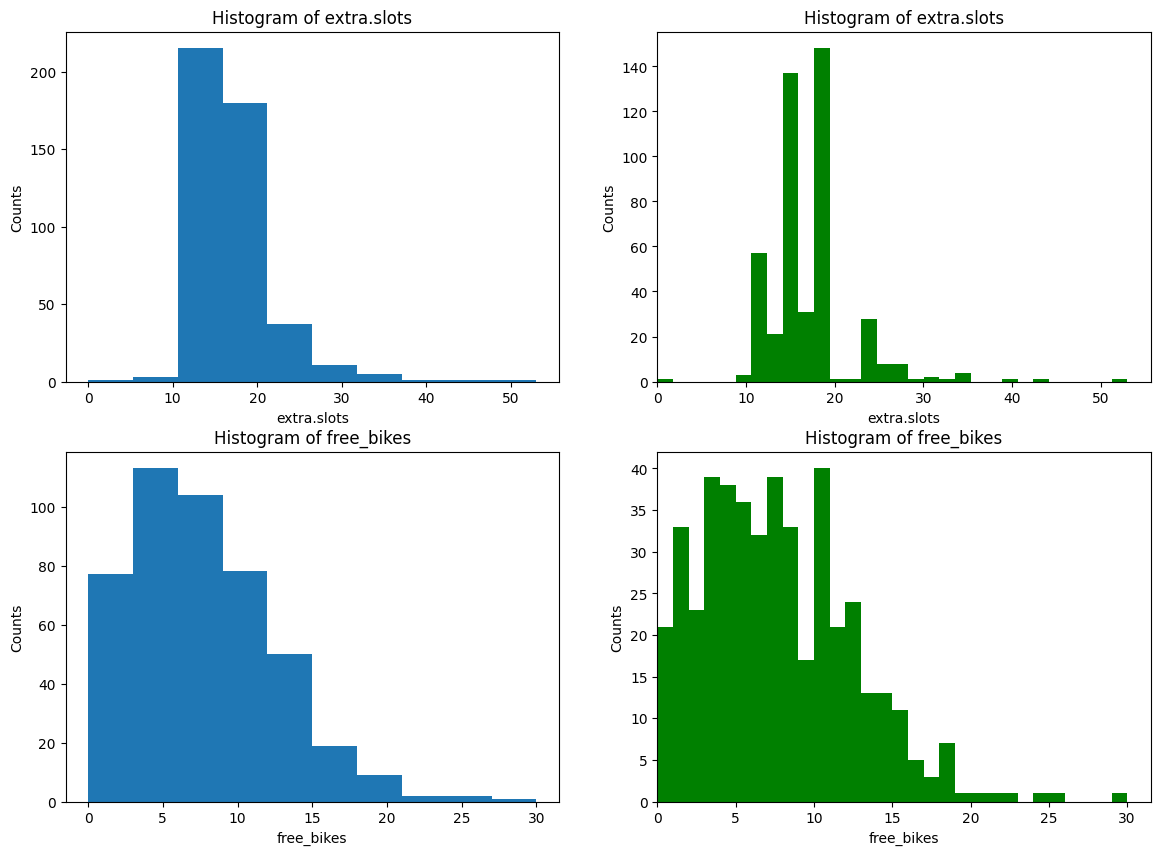

In [363]:
# histogram visualization of city_bike columns (extra.slots and free_bikes to detect the distribution of this variables.)

fig, axes = plt.subplots(nrows = 2, 
                         ncols = 2, 
                         figsize=(14, 10)        
                        )

# Plot 0,0
axes[0,0].hist(df['extra.slots'])
axes[0,0].set_title('Histogram of extra.slots')
axes[0,0].set_xlabel('extra.slots')
axes[0,0].set_ylabel('Counts')

# Plot 0,1
axes[0,1].hist(df['extra.slots'], bins=30, color='green')
axes[0,1].set_title('Histogram of extra.slots')
axes[0,1].set_xlabel('extra.slots')
axes[0,1].set_ylabel('Counts')
axes[0,1].set_xlim(left=0)
#axes[0,1].set_xlim(right=0)

# Plot 1,0
axes[1,0].hist(df['free_bikes'])
axes[1,0].set_title('Histogram of free_bikes')
axes[1,0].set_xlabel('free_bikes')
axes[1,0].set_ylabel('Counts')

# Plot 1,1
axes[1,1].hist(df['free_bikes'], bins=30, color='green')
axes[1,1].set_title('Histogram of free_bikes')
axes[1,1].set_xlabel('free_bikes')
axes[1,1].set_ylabel('Counts')
axes[1,1].set_xlim(left=0)

plt.show()

The no location  in Boston that have 50 extra.slot of bikes is about 10 while the 200 locations  have 18 extra.slots .meaning the extra.slots distribution varies but what is common is 18 in number.
while the highest no of free_bikes available at any location is around 5. this is showing the distribution of free bikes.

In [36]:
# using seaborn to examine the distribution of free bikes and extra slots in Boston
import seaborn as sns

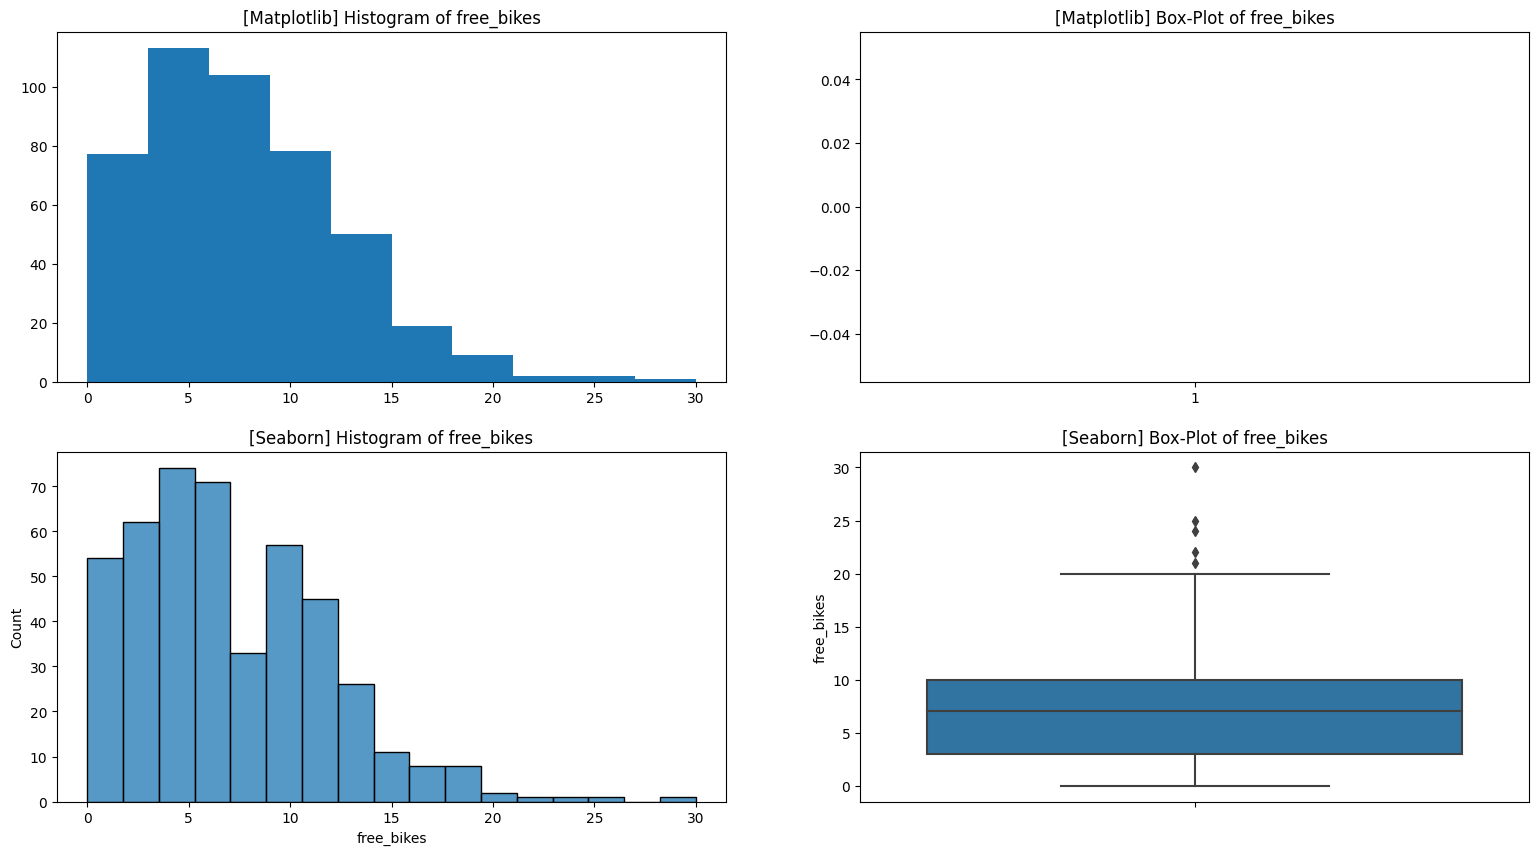

In [476]:
#  a figure with 4 axes/subplot?
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(19, 10))

#matplotlib
axes[0,0].hist(df['free_bikes'])
axes[0,0].set_title('[Matplotlib] Histogram of free_bikes')

axes[0,1].boxplot(df['free_bikes'])
axes[0,1].set_title('[Matplotlib] Box-Plot of free_bikes')

#seaborn
sns.histplot(ax=axes[1,0], data=df, x="free_bikes")
axes[1,0].set_title('[Seaborn] Histogram of free_bikes')

sns.boxplot(ax=axes[1,1], data=df, y="free_bikes")
axes[1,1].set_title('[Seaborn] Box-Plot of free_bikes')

plt.show()

In [367]:
import seaborn as sns

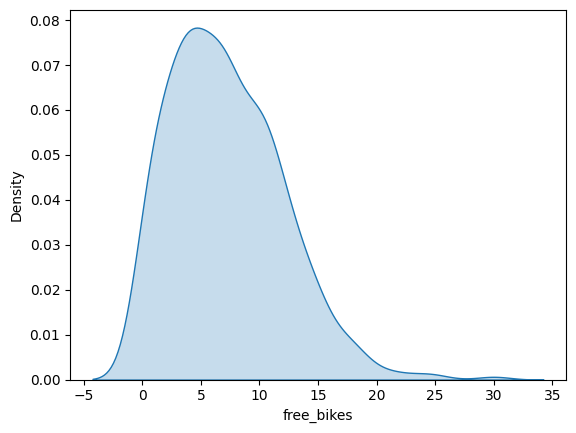

In [368]:
#to visualize a smooth version of the free-bike distribution in Boston before  standardization
sns.kdeplot(data=df, 
            x="free_bikes", 
            fill=True)
plt.show()

free_bikes distribution shows that the common amount of bikes allocated to an area  isn't really higher than 5.

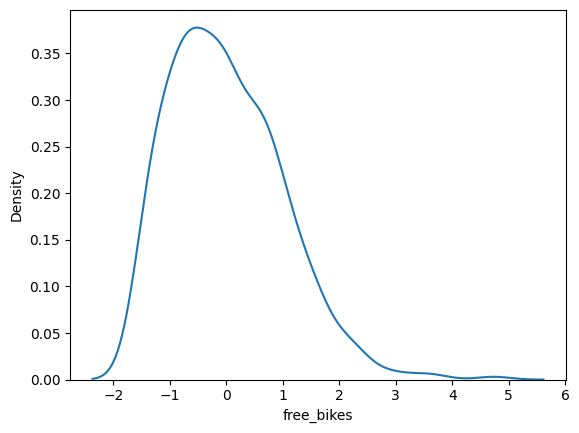

-6.246529545143738e-17 1.0


In [494]:
#visualize a smooth version of the free-bike distribution in Boston after  standardization
free_bikes_standardized = (df['free_bikes'] - df['free_bikes'].mean()) / df['free_bikes'].std()
sns.kdeplot(free_bikes_standardized)
plt.show()
# the data have a mean of zero and standard deviation of around1
print(free_bikes_standardized.mean(), free_bikes_standardized.std())

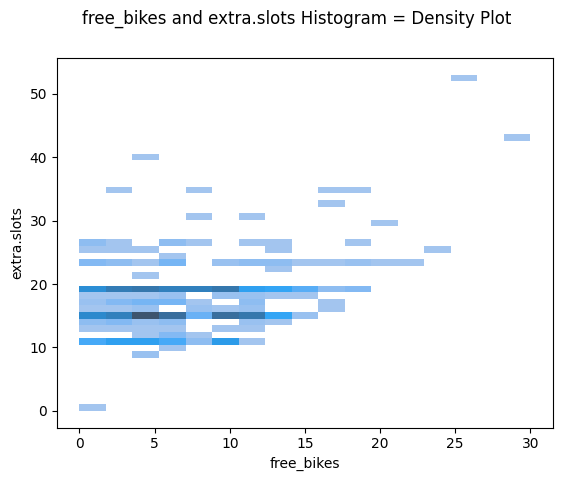

In [369]:
#for multiple variables
# The no of extra.slots allocated is determined(dependent on) by the no of free bikes available? 
sns.histplot(data=df, 
             x="free_bikes", 
             y="extra.slots")

plt.suptitle("free_bikes and extra.slots Histogram = Density Plot")

plt.show()

In [485]:
#pearson's correlation coefficient used to check correlation between numerical variables of free_bikes and extra.slot while  dropping empty rows in both columns.
#Ho: no correlation between the two variables
#Ha;correlation between the two variables
from scipy.stats import pearsonr

data1 = df['free_bikes'].dropna()
data2 = df['extra.slots'].dropna()

stat, p = pearsonr(data1, data2)
print('stat=%.3f, p=%.3f' % (stat, p))

if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')


stat=0.318, p=0.000
Probably dependent


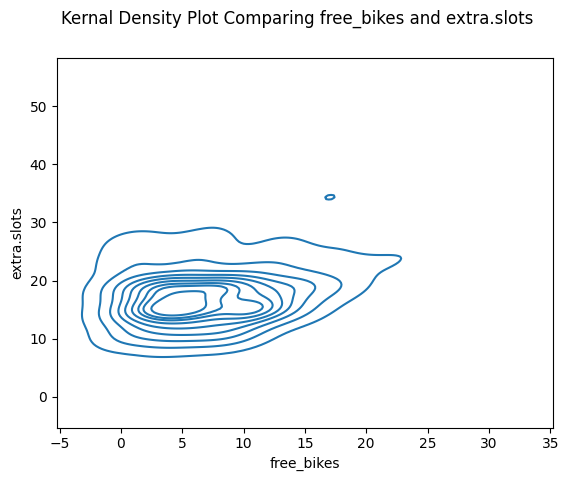

In [370]:
#
sns.kdeplot(data=df, 
            x="free_bikes", 
            y="extra.slots")
plt.suptitle("Kernal Density Plot Comparing free_bikes and extra.slots")
plt.show()

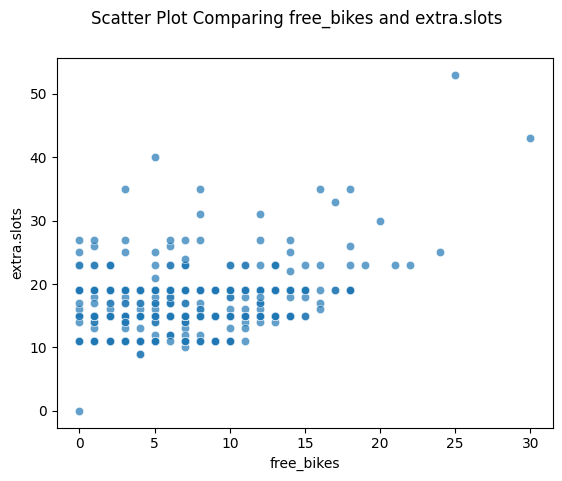

In [371]:
# using scattered plots showing correlation test between free_bikes and extra.slots.

sns.scatterplot(data=df, 
                x="free_bikes", 
                y="extra.slots",
                alpha = 0.7)
plt.suptitle("Scatter Plot Comparing free_bikes and extra.slots")
plt.show()

In [491]:
from scipy.stats import pearsonr

data1 = df['free_bikes'].dropna()
data2 = df['extra.slots'].dropna()

stat, p = pearsonr(data1, data2)
print('%0.60f' % p)


0.000000000003852964347710248812199477088026954951609226451836


In [256]:
#INITIAL PATTERNS AND RELATIONSHIP DISCOVERED DURING THE VISUALIZATION OF THE CITY_BIKE dataframe Show  there is correlation between free_bikes and extra_slots of bikes within
#bike stations in Boston since p-value is  less than 0.05.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [457]:
import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    connection = None
    try:
        connection = sqlite3.connect(db_file)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

# Provide the path and filename for your SQLite database file
db_file = r'C:\Users\layin\OneDrive\Desktop\all_python\3dataframe folder\database-new.db'

# Create a connection to the SQLite database
connection = create_connection(db_file)

# Close the connection when you're done with it
if connection:
    connection.close()


Connection to SQLite DB successful


In [463]:
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


In [ ]:
# to save to your local machine
import pandas as pd
# Save the DataFrame as a CSV file
df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file1.csv', index=False)
foursquare_df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file2.csv', index=False)
yelp_df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file3.csv', index=False)
combined_df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file3.csv', index=False)
totalcombined_df.to_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\citybike_folder\file4.csv', index=False)

In [ ]:
#to perform merging in sql for the 3  columns
import sqlite3
import pandas as pd


# Establish a connection to an SQLite database
conn = sqlite3.connect('sm_app.sqlite.db')

# Read the CSV files into Pandas DataFrames
df = pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\3dataframe folder\file.csv')
df1 = pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\3dataframe folder\file1.csv')
df2 = pd.read_csv(r'C:\Users\layin\OneDrive\Desktop\all_python\3dataframe folder\file2.csv')

# Write the DataFrames to the SQLite database
df.to_sql('df', conn, if_exists='replace', index=False)
df1.to_sql('df1', conn, if_exists='replace', index=False)
df2.to_sql('df2', conn, if_exists='replace', index=False)

# Perform the merging using SQL queries
query = '''
    SELECT *
    FROM df
    INNER JOIN df1 ON longitude = longitude
    INNER JOIN df2 ON postcodes = postcodes
'''
merged_df = pd.read_sql_query(query, conn)

# Close the connection to the database
conn.close()

# Display the merged DataFrame
print(merged_df)


Look at the data before and after the join to validate your data.

In [266]:
#looking at the newly merged data frame after the join to validate the data.

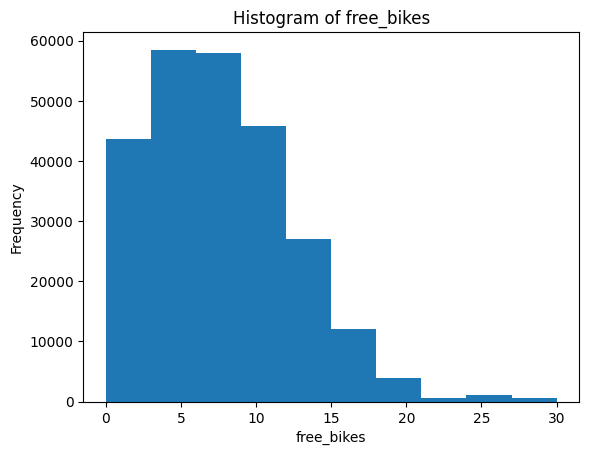

In [436]:

# looking at the newly merged dataframe after joining to validate  the data I used histogram for Free_bikes validation
# Example: Plotting a histogram of a numerical column
import matplotlib.pyplot as plt
plt.hist(totalcombined_df['free_bikes'])
plt.xlabel('free_bikes')
plt.ylabel('Frequency')
plt.title('Histogram of free_bikes')
plt.show()
